In [131]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import mido

import theano
import theano.tensor as T
from theano.tensor.shared_randomstreams import RandomStreams

In [132]:
class MidiSong:
    def __init__(self, filename, r=(40, 109), dt=0.1):
        ''' Initializes a song by reading in the midi file and
        creating a pianoroll from it
        
        filename: filename
        r: pitch range
        dt: time resolution
        '''
        midi = mido.MidiFile(filename)
        self.notes = []
        time = 0.0
        on_notes = {}
        for msg in midi:
            # time in ticks
            time += msg.time
            if not isinstance(msg, mido.MetaMessage):
                if msg.type == 'note_on':
                    on_notes[msg.note] = time
                elif (msg.type == 'note_off'
                    and msg.note in on_notes
                    and on_notes[msg.note] > 0.0):
                    self.notes.append([msg.note, on_notes[msg.note], time])
                    on_notes[msg.note] = -1.0
        # Create the pianoroll
        dur = np.array(self.notes).max(axis=0)[2] / dt
        self.piano_roll = np.zeros( (int(np.ceil(dur)), r[1]-r[0]) )
        # Resolves each note into a key and time slice in the pianoroll
        for n in self.notes:
             self.piano_roll[int(np.ceil(n[1]/dt)):
                             int(np.ceil(n[2]/dt)), int(n[0]-r[0])] = 1.0

In [128]:
song1 = MidiSong('processed/riemenschneider001.mid')
song2 = MidiSong('processed/riemenschneider002.mid')

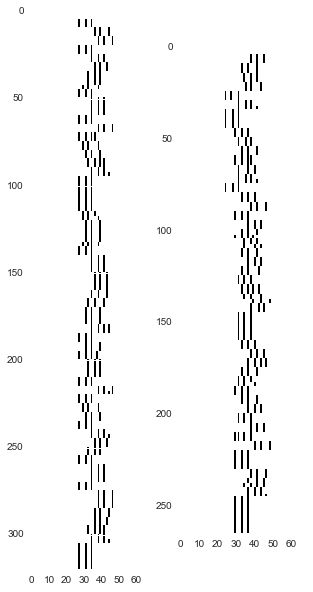

In [129]:
f, ax = plt.subplots(1,2, figsize=(5,10))
ax[0].imshow(song1.piano_roll, interpolation='nearest')
plt.grid('off')
ax[1].imshow(song2.piano_roll, interpolation='nearest')
plt.grid('off')
plt.show()

In [139]:
data = []
for f in os.listdir('processed/'):
    if f.endswith('.mid'):
        try:
            data.append( MidiSong(os.path.join('processed/', f)) )
        except KeyError:
            print('fail on', f)

fail on riemenschneider006.mid
fail on riemenschneider008.mid
fail on riemenschneider015.mid


In [ ]:
epochs = 200
batch_size = 100

for epoch in range(epochs):
    np.random.shuffle(data)
    # Iterate through each song's pianoroll
    for s, proll in enumerate(data):
        # Chunk it into batches
        for i in range(0, len(proll), batch_size):
            cost = train()